# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [3]:
data_train = pd.read_csv('diamonds_train.csv')
data_train.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,-0.060196,-1.512170,1.376345,0.166005,0.181770,0.027073,4,1,2,2319
1,1.946989,0.279788,0.877560,1.650049,1.614625,1.664112,3,2,1,7500
2,2.074026,0.468415,-1.616364,1.748330,1.792497,1.823048,4,0,1,6966
3,1.388026,-0.380407,-0.120010,1.414174,1.347817,1.330347,4,1,3,6308
4,-1.076492,0.279788,-1.616364,-1.170618,-1.241204,-1.180839,4,6,3,942


In [4]:
data_test = pd.read_csv('diamonds_test.csv')
data_test.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.702026,-1.040602,0.877560,0.775347,0.804321,0.678710,3,0,0,2488
1,-1.101899,-2.266678,1.376345,-1.200102,-1.251085,-1.387455,3,6,4,848
2,-0.924048,1.788806,-1.117579,-0.993712,-1.043568,-0.878861,1,6,2,874
3,-0.034789,0.185475,-1.117579,0.136520,0.162006,0.170115,4,2,6,2958
4,-0.797011,-0.286093,-1.616364,-0.748009,-0.806406,-0.799393,4,6,4,1235


In [5]:
data_train.corr()['price']

carat      0.907576
depth     -0.008752
table      0.120913
x          0.874606
y          0.875852
z          0.870996
cut       -0.044033
color     -0.092526
clarity   -0.076523
price      1.000000
Name: price, dtype: float64

# Modelling Phase

## Training Phase

In [22]:
# Machine learning model 1 training phase (simple linear regression)

X_train = data_train[['carat']]
y_train = data_train['price']

X_test = data_test[['carat']]
y_test = data_test['price']

In [23]:
clf = LinearRegression()

In [24]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Machine learning model 1 training phase (multiple linear regression)

X2_train = data_train.drop(['price'], axis = 1)
y2_train = data_train['price']

X2_test = data_test.drop(['price'], axis = 1)
y2_test = data_test['price']

In [26]:
clf2 = LinearRegression()

In [27]:
clf2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing Phase

In [29]:
# Machine learning model 1 testing phase (simple linear regression)

pred1 = clf.predict(X_test)
pred1

array([5607.0095326 ,  104.42829755,  646.93630664, ..., 5607.0095326 ,
       9482.06674039,  336.93173002])

In [31]:
pd.DataFrame({'actual':y_test,'predict':pred1})

,actual,predict
0,2488,5607.009533
1,848,104.428298
2,874,646.936307
3,2958,3359.476352
4,1235,1034.442027
5,9301,9482.066740
6,10096,9482.066740
7,2230,2119.458046
8,969,724.437451
9,1158,879.439739


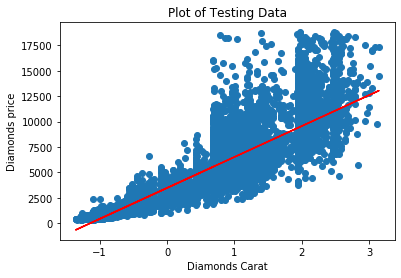

In [32]:
plt.scatter(X_test, y_test) #data aktual
plt.plot(X_test,pred1,color = 'r') #model prediksi
plt.title('Plot of Testing Data')
plt.xlabel('Diamonds Carat')
plt.ylabel('Diamonds price')
plt.show()

In [34]:
# Machine learning model 2 testing phase (multiple linear regression)

pred2 = clf2.predict(X2_test)
pred2

array([3188.82554927, 1260.58815286,  533.84259509, ..., 4667.03460752,
       9519.00794522,  683.97842613])

In [35]:
pd.DataFrame({'actual':y2_test,'predict':pred2})

,actual,predict
0,2488,3188.825549
1,848,1260.588153
2,874,533.842595
3,2958,3917.350213
4,1235,2077.540945
5,9301,9801.915406
6,10096,9798.202789
7,2230,2063.840284
8,969,-119.612431
9,1158,2065.069627


## Optimization Phase

In [46]:
# Machine learning model 1 optimization phase

#no optimization for linear regression

In [44]:
# And keep on...

## Ensamble Phase (optional)

<hr>

# Evaluation

From data modeling that has been done, please state your evaluation/conclusion related to:

1. Our dataset behaviour (how our prediction characteristic & trend)
2. Model Analysis, including their parameter & performance
3. Result after optimization phase
4. Relate your analysis with EDA & preprocessing that you have done before
5. Another improvement that must be done to increase your model performance

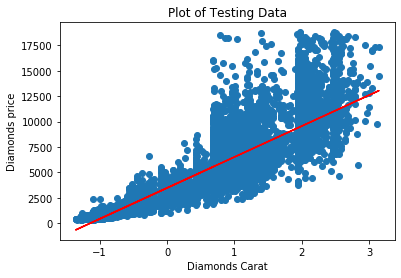

In [36]:
# Dataset behaviour

plt.scatter(X_test, y_test) #data aktual
plt.plot(X_test,pred1,color = 'r') #model prediksi
plt.title('Plot of Testing Data')
plt.xlabel('Diamonds Carat')
plt.ylabel('Diamonds price')
plt.show()

In [42]:
# Model analysis

print("simple linear regression")
print("MSE = ", mean_squared_error(y_test, pred1))
print("MAE = ", mean_absolute_error(y_test, pred1))
print("r2-score = ", r2_score(y_test, pred1))

print()

print("multiple linear regression")
print("MSE = ", mean_squared_error(y2_test, pred2))
print("MAE = ", mean_absolute_error(y2_test, pred2))
print("r2-score = ", r2_score(y2_test, pred2))

print()

print("hasil prediksi membuktikan bahwa regresi linear dengan menggunakan semua fitur lebih baik walaupun dengan carat saja sudah cukup baik")

simple linear regression
MSE =  2012716.9560456807
MAE =  918.2044893366806
r2-score =  0.8207950260022128

multiple linear regression
MSE =  1076807.1618797032
MAE =  702.8562375239809
r2-score =  0.9041250192354897

hasil prediksi membuktikan bahwa regresi linear dengan menggunakan semua fitur lebih baik walaupun dengan carat saja sudah cukup baik


In [45]:
# Result after optimization phase

#no optimization for linear regression